# Visualizing Latent dimesnions

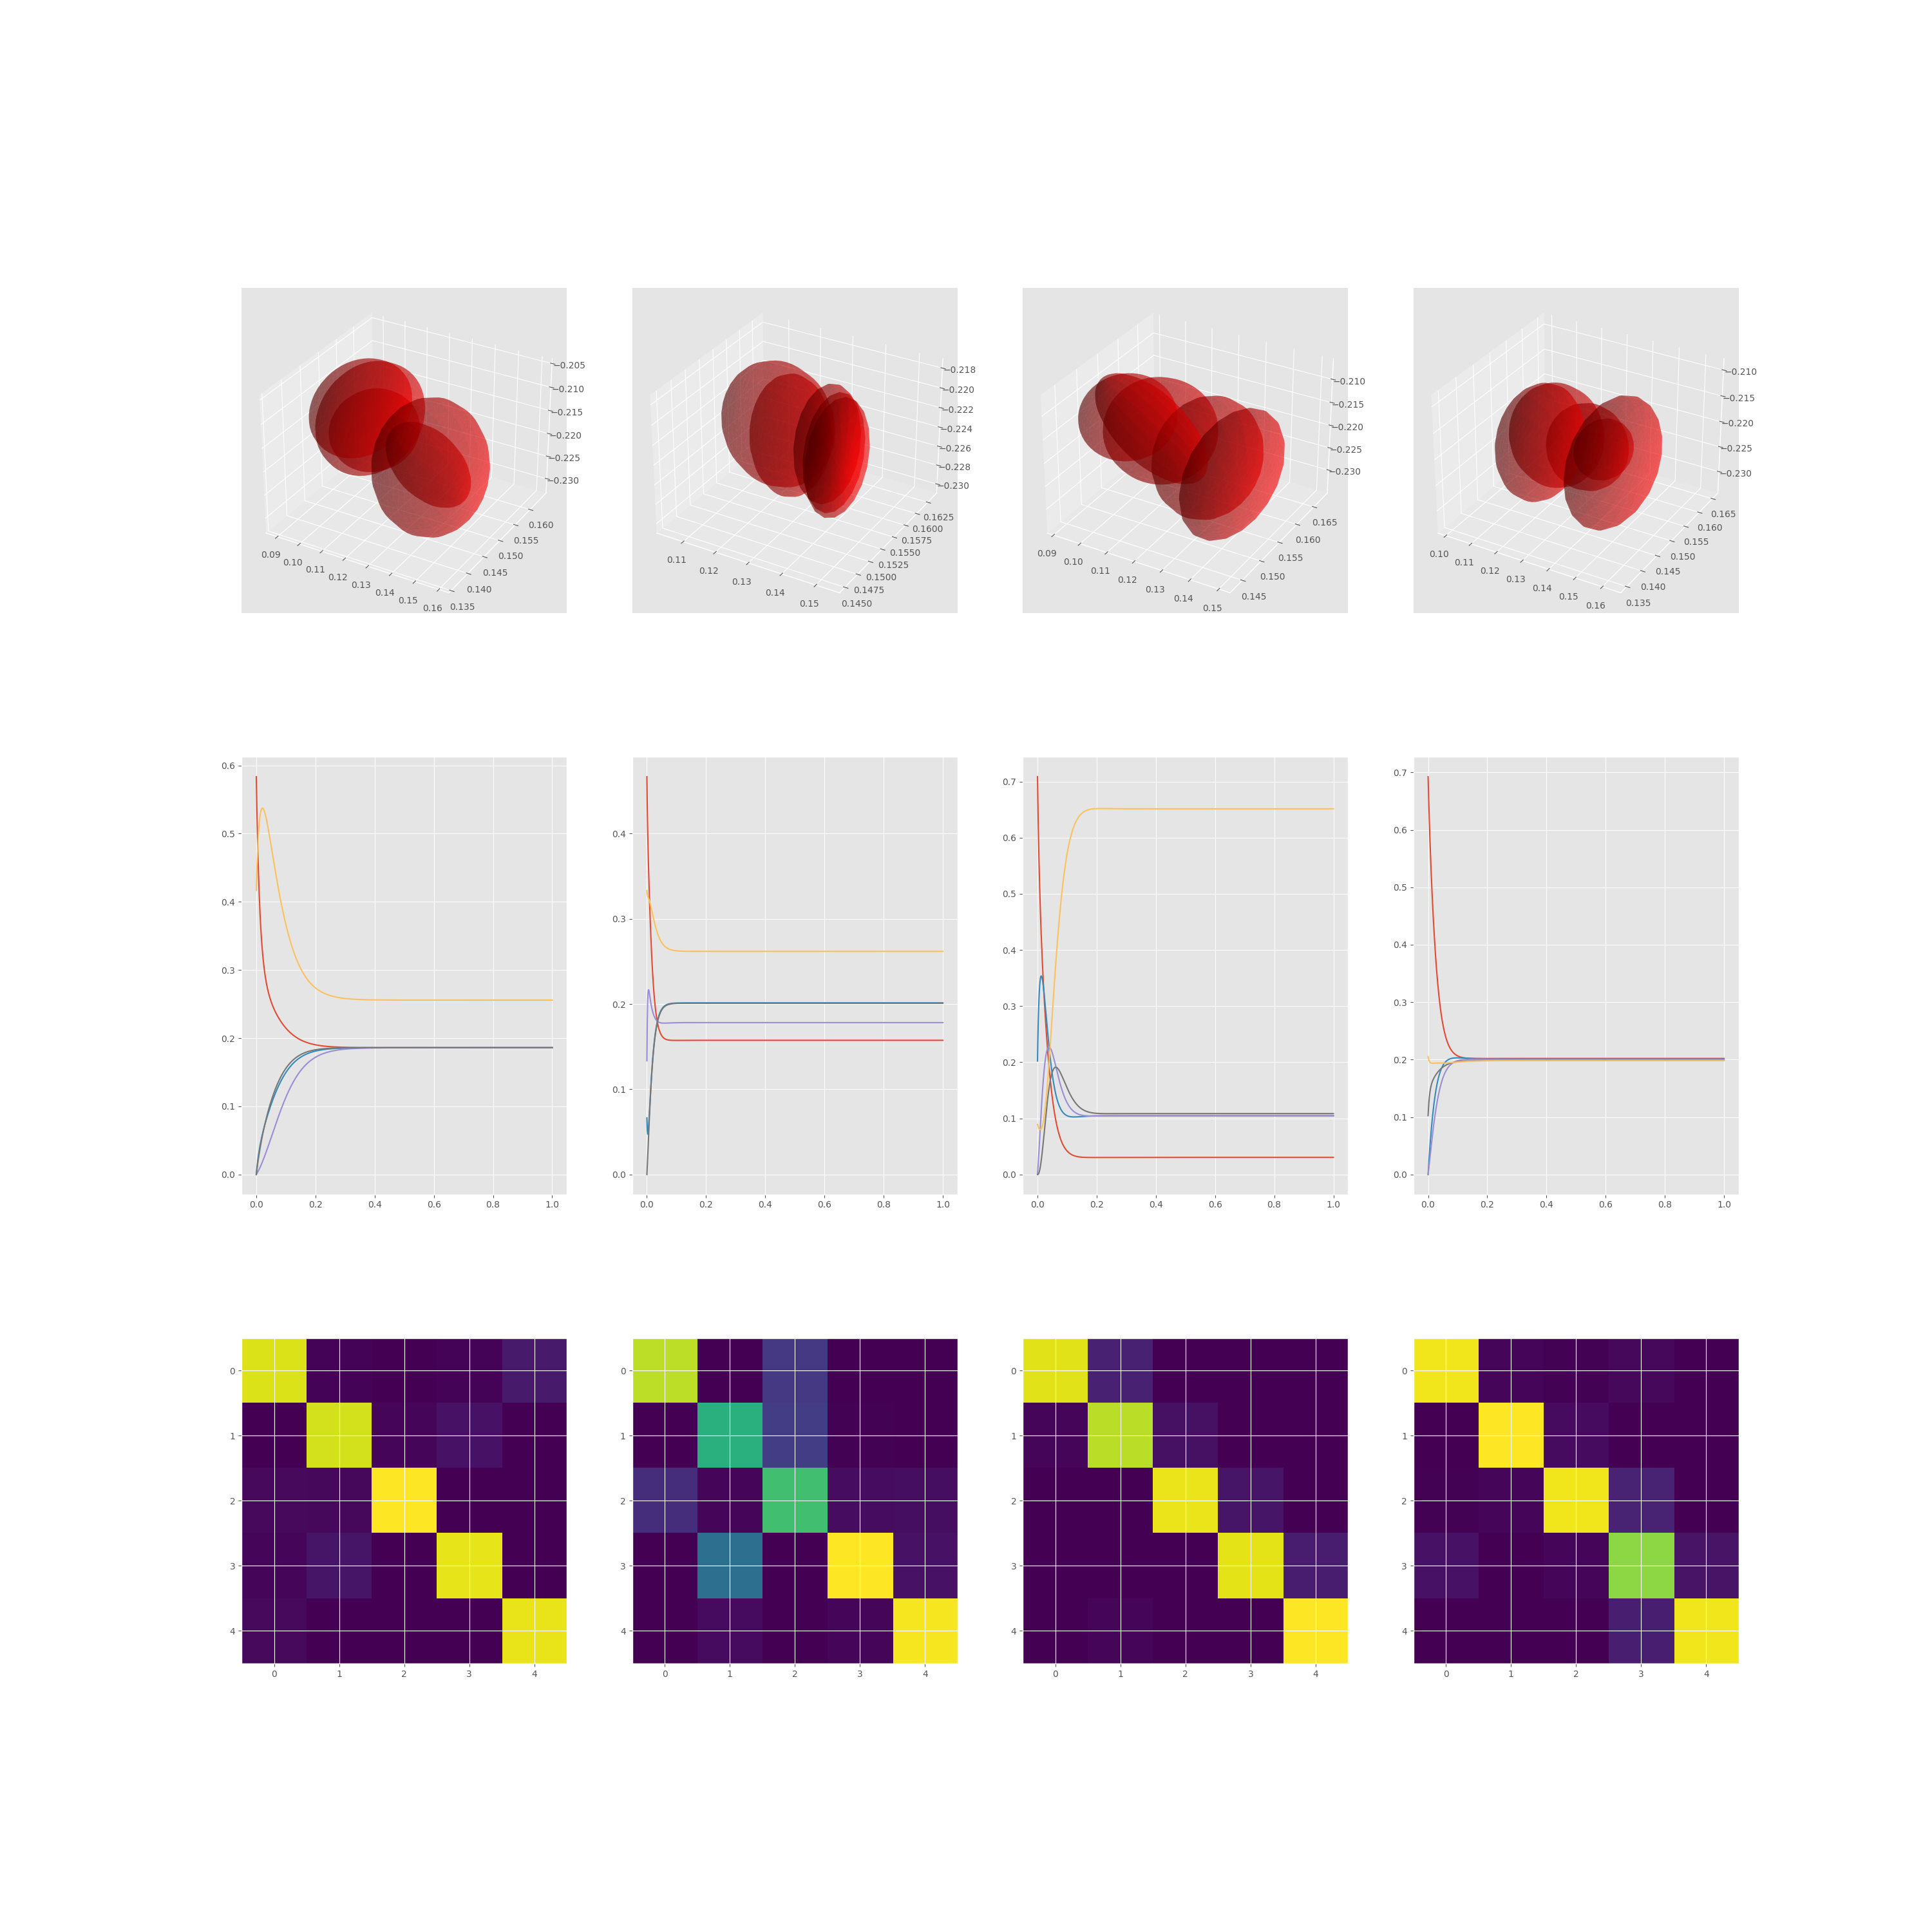

In [7]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

import pbdlib_torch as pbd_torch

import torch

ckpt_path = input()
ckpt = torch.load(ckpt_path)
ssm_list = ckpt['ssm']
z_dim = ssm_list[0].nb_dim//2
actions = ['Hand Wave', 'Hand Shake', 'Rocket Fistbump', 'Parachute Fistbump']

fig = plt.figure(figsize=(30,30))
ax_dists = []
ax_alpha= [] 
ax_trans = []
for i in range(len(ssm_list)):
	ax_dists.append(fig.add_subplot(3, len(ssm_list), i+1, projection='3d'))
	ax_alpha.append(fig.add_subplot(3, len(ssm_list), len(ssm_list)+i+1))
	ax_trans.append(fig.add_subplot(3, len(ssm_list), 2*len(ssm_list)+i+1))
for a in range(len(ssm_list)):
	ssm = ssm_list[a]

	alpha = ssm.forward_variable(marginal=[], sample_size=800)
	
	ax_alpha[a].plot(np.linspace(0, 1, 800), alpha.T.detach().cpu().numpy(), linestyle='-')
	ax_trans[a].imshow(ssm.Trans.detach().cpu().numpy())
	
	for i in range(ssm.nb_states):
		pbd_torch.plot_gauss3d(ax_dists[a], ssm.mu[i, :3].detach().cpu().numpy(), ssm.sigma[i, :3, :3].detach().cpu().numpy(),
					color='red', alpha=0.4)
		pbd_torch.plot_gauss3d(ax_dists[a], ssm.mu[i, z_dim:z_dim+3].detach().cpu().numpy(), ssm.sigma[i, z_dim:z_dim+3, z_dim:z_dim+3].detach().cpu().numpy(),
					color='blue', alpha=0.4)
